<a href="https://colab.research.google.com/github/jwoonge/ML-projects/blob/master/assignment_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-means Clustering  
20141261 송제웅
<hr>

## 0. Import Library  
---
import library

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import copy
from google.colab import drive
import warnings
import pandas as pd
warnings.filterwarnings("ignore")

## 1. Load dataset
---

In [ ]:
drive.mount('/content/gdrive')
dataset = pd.read_csv('gdrive/My Drive/4-2/07/data-kmeans.csv')
global data; data = dataset.values
global k; k = 5

## 2. Distance
---

In [5]:
def compute_distance(a, b):
    return np.sqrt(np.sum(np.square(a-b), axis=-1))

## 3. Centroid  
---
calculate centroid of a cluster set Z

In [6]:
def compute_centroid(Z):
    return np.average(Z, axis=0)

## 4. Label
---
determine the label of point z with a set of centroids M

In [7]:
def compute_label(z, M):
    return np.argmin(compute_distance(z, M), axis=-1)

## 5. Loss
---
compute loss for a set of clusters C and a set of centroids M

In [8]:
def compute_loss(C, M):
    loss = 0
    for i in range(k):
        cluster = data[C==i]
        dists = compute_distance(cluster, M[i])
        loss += np.sum(dists)
    return loss/len(data)

## 6. Random cluster Initialization
--- 

In [9]:
def random_initialize():
    labels = np.zeros(len(data))
    for i in range(len(data)):
        labels[i] = np.random.randint(k)
    return labels

## 7. Implement k-means clustering
---


In [13]:
def k_means_clustering():
    bst_loss = []
    bst_centroids = []
    bst_labels = []
    
    for t in range(100):
        labels = random_initialize()
        labels_it = [copy.deepcopy(labels)]
        loss_it = []
        centroids_it = []
        break_cnt = 0
        while True:
            # calculate centroids
            centroids = []
            for i in range(k):
                centroids.append(compute_centroid(data[labels==i]))
            centroids = np.array(centroids)
            # update labels
            labels = np.zeros(len(data))
            for i in range(len(data)):
                labels[i] = compute_label(data[i,:], centroids)
            
            loss_it.append(compute_loss(labels, centroids))
            centroids_it.append(centroids)
            labels_it.append(labels)
            if len(loss_it) > 1 and loss_it[-1]==loss_it[-2]:
                break_cnt += 1
            if break_cnt >10:
                break
        if t==0:
            bst_loss = copy.deepcopy(loss_it)
            bst_centroids = copy.deepcopy(centroids_it)
            bst_labels = copy.deepcopy(labels_it)
        else:
            if bst_loss[-1] > loss_it[-1]:
                bst_loss = copy.deepcopy(loss_it)
                bst_centroids = copy.deepcopy(centroids_it)
                bst_labels = copy.deepcopy(labels_it)
    bst_centroids = np.array(bst_centroids)
    bst_centroids_distance = compute_distance([0,0], bst_centroids)
    return bst_labels, bst_loss, bst_centroids, bst_centroids_distance

## 8. Plot the Clusters
---


In [17]:
def plot_clusters(labels, centroid):
    color_it = iter(plt.cm.rainbow(np.linspace(0,1,k)))
    for i in range(k):
        cluster = data[labels==i]
        color = next(color_it).reshape(1,-1)
        plt.scatter(cluster[:,0], cluster[:,1], label='Cluster '+str(i), c=color)
    plt.scatter(centroid[:,0], centroid[:,1], marker='X', label='Centroids')
    plt.legend()
    plt.title('cluster')
    plt.show()

## 9. Run the algorithm
---

In [14]:
labels, loss, centroids, centroid_distances = k_means_clustering()

---
## Results
---
   
   ## 1. Plot the data points

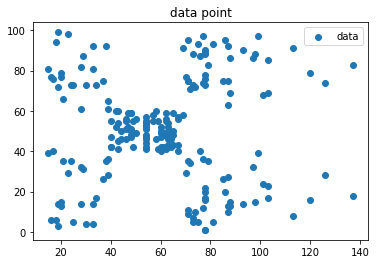

In [15]:
plt.scatter(data[:,0], data[:,1], label='data')
plt.title('data point')
plt.legend()
plt.show()

## 2. Visualize the initial condition of the point labels

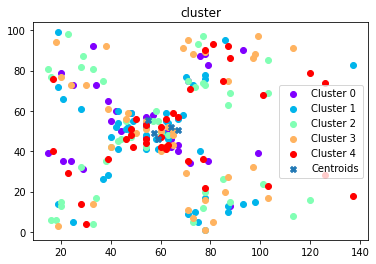

In [18]:
plot_clusters(labels[0], centroids[0])

## 3. Plot the loss curve

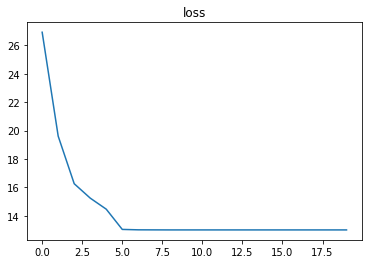

In [19]:
plt.plot(loss)
plt.title('loss')
plt.show()

## 4. Plot the centroid of each cluster

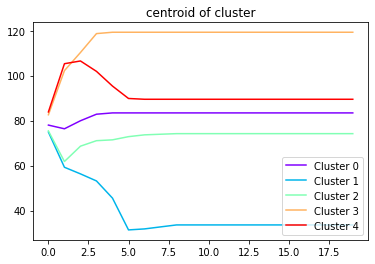

In [20]:
color_it = iter(plt.cm.rainbow(np.linspace(0,1,k)))
for i in range(k):
    color = next(color_it)
    plt.plot(centroid_distances[:,i], label='Cluster '+str(i), c=color)
plt.legend()
plt.title('centroid of cluster')
plt.show()

## 5. Plot the final clustering result

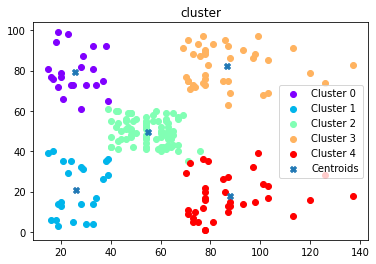

In [21]:
plot_clusters(labels[-1], centroids[-1])